# Dataset Name: book_data.csv
Description: dataset of 54301 books 

    includes columns:
    1. book_authors
    2. book_desc
    3. book_edition
    4. book_format
    5. book_isbn
    6. book_pages
    7. book_rating
    8. book_rating_count
    9. book_review_count
    10. book_title
    11. genres (separated with '|')
    12. image_url

# Load Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import csv
import seaborn as sns
import statistics as stat
import collections
from numpy.random import rand
from matplotlib.colors import ListedColormap
my_cmap = ListedColormap(sns.color_palette('YlOrBr'))
my_cmap2 = ListedColormap(sns.color_palette('Blues_d'))
from matplotlib.colors import Normalize

# Data Preprocessing
{printing attributes, removing null values, drop 'book_isbn'}

In [2]:
books = pd.read_csv('book_data.csv',error_bad_lines = False) 
type(books) # books is a DataFrame

pandas.core.frame.DataFrame

In [3]:
print("There are {} rows and {} columns in the dataset.".format(books.shape[0], books.shape[1]))

There are 54301 rows and 12 columns in the dataset.


In [4]:
books.shape

(54301, 12)

In [5]:
attributes = np.array(books.columns)
print(attributes)

['book_authors' 'book_desc' 'book_edition' 'book_format' 'book_isbn'
 'book_pages' 'book_rating' 'book_rating_count' 'book_review_count'
 'book_title' 'genres' 'image_url']


A Glimpse into the Rows/Columns of the Dataset:

In [40]:
books.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,rate_group,genres_spanned,books_format,title_word_len,book_pgs
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,Good (4-4.5),6.0,2,3.0,374.0
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,Good (4-4.5),3.0,1,8.0,870.0
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,Good (4-4.5),6.0,1,4.0,324.0
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,Good (4-4.5),3.0,1,3.0,279.0
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,Decent (3.5-4),8.0,1,1.0,498.0


In [7]:
#columns which contain null values and the number of null elements
null_counts = books.isnull().sum()
null_counts[null_counts > 0].sort_values(ascending=False) #null_counts in each column (sorted)

book_edition    48848
book_isbn       12866
genres           3242
book_pages       2522
book_format      1656
book_desc        1331
image_url         683
dtype: int64

In [8]:
# gives percentages of missing/null data for each column
null_percentages = null_counts/books.shape[0]
null_percentages[null_percentages > 0].sort_values(ascending=False)

book_edition    0.899578
book_isbn       0.236939
genres          0.059704
book_pages      0.046445
book_format     0.030497
book_desc       0.024512
image_url       0.012578
dtype: float64

In [9]:
#columns
np.array(books.columns)

array(['book_authors', 'book_desc', 'book_edition', 'book_format',
       'book_isbn', 'book_pages', 'book_rating', 'book_rating_count',
       'book_review_count', 'book_title', 'genres', 'image_url'],
      dtype=object)

In [10]:
# removing book_isbn column from dataframe 'books'
books.drop(labels='book_isbn', axis=1, index=None, columns=None, level=None, inplace=False, errors='raise')

,book_authors,book_desc,book_edition,book_format,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...
...,...,...,...,...,...,...,...,...,...,...,...
54296,Howard Megdal,"In this fearless and half-crazy story, Howard ...",NaN,Hardcover,256 pages,3.37,27,9,Taking the Field: A Fan's Quest to Run the Tea...,Sports|Baseball|Sports and Games|Sports|Nonfic...,https://images.gr-assets.com/books/1312074392l...
54297,Howard Megdal,From the icons of the game to the players who ...,NaN,Hardcover,256 pages,3.97,34,5,"The Baseball Talmud: Koufax, Greenberg, and th...",Nonfiction|Sports and Games|Sports,https://images.gr-assets.com/books/1348841629l...
54298,Howard Megdal,NaN,NaN,Kindle Edition,NaN,3.66,32,3,"Wilpon's Folly - The Story of a Man, His Fortu...",Sports|Baseball|Abandoned,https://images.gr-assets.com/books/1394277097l...
54299,Mimi Baird|Eve Claxton,"Soon to be a major motion picture, from Brad P...",NaN,Hardcover,272 pages,3.82,867,187,He Wanted the Moon: The Madness and Medical Ge...,Nonfiction|Autobiography|Memoir|Biography|Psyc...,https://images.gr-assets.com/books/1403192135l...


In [42]:
print("Number of unique Book Titles: ", len(np.unique(books['book_title']))) #unique elements in the column
print("Not unique: ", books.shape[0]- len(np.unique(books['book_title']))) #not unique elements in this column
#print("Book Titles", np.unique(books['book_title'])) #unique elements in this column

Number of unique Book Titles:  48483
Not unique:  5818


In [43]:
print("Number of unique Authors: ", len(np.unique(books['book_authors']))) #unique elements in the column
print("Not unique: ", books.shape[0]- len(np.unique(books['book_authors']))) #not unique elements in this column
#print("Book Authors", np.unique(books['book_authors'])) #unique elements in this column

Number of unique Authors:  27159
Not unique:  27142


# Query 1: Getting Top 10 Genres

In [44]:
# parse through genres to idenify unique categories
genre_arr = np.array(books['genres'])
#print(genre_arr)
unique_genres = []
ave_genres_per_book = 0
total_num_books = 0

for indx in genre_arr:
    string = str(indx)
    temp = string.split("|")
    ave_genres_per_book += len(temp)
    total_num_books += 1
    for i in temp:
        if i not in unique_genres:
            unique_genres.append(i)

print("Ave number of Genres per Book: ", str(ave_genres_per_book/total_num_books))
#print("Number of unique genres: ", str(len(unique_genres)))  

Ave number of Genres per Book:  5.582364965654408


In [45]:
# make dictionary where the keys are the unique genres and the values are the count of books that satisfy that genre
genres_dict = dict.fromkeys(unique_genres, 0)
# find book count that falls under every unique genres
for indx in genre_arr:
    string = str(indx)
    temp = tuple(string.split("|"))
    for gen in temp:
        genres_dict[gen] += 1
# sort genres dict
sorted_dict = {}
sorted_keys = sorted(genres_dict, key=genres_dict.get)
for k in sorted_keys:
    sorted_dict[k] = genres_dict[k]

In [46]:
# get top 10 genres only for plotting bar graph
top_ten_genres = list(sorted_dict)[-11:-1]
final_genres_dict = {}
for i in top_ten_genres:
    final_genres_dict[i] =(sorted_dict[i])
keys = final_genres_dict.keys()
values = final_genres_dict.values()
values_list = list(values)  
print(final_genres_dict)

{'Classics': 6379, 'Historical Fiction': 6448, 'Science Fiction': 6821, 'Nonfiction': 7727, 'Mystery': 7960, 'Paranormal': 8018, 'Historical': 10868, 'Young Adult': 11320, 'Romance': 18732, 'Fantasy': 23722}


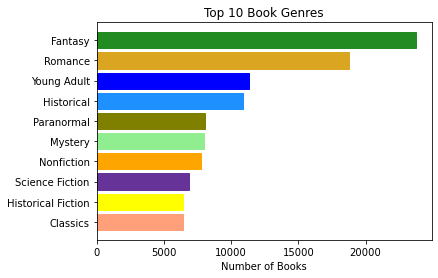

In [47]:
x1 = list(keys)
y1 = list(values)
# make horizontal bar plot to be more consistent style with other bar plots
barlist = plt.barh(x1, y1)
# use custom color palette to match with genres vs ratings vs frequency bubble plot
colors = ["Crimson", "LightSalmon", "#FFFF00", "#663399", "Orange", "#90EE90", "#808000", "#1E90FF", "#0000FF", "#DAA520", "#228B22", "red", "#3CB371"]
barlist[0].set_color(colors[1])
barlist[1].set_color(colors[2])
barlist[2].set_color(colors[3])
barlist[3].set_color(colors[4])
barlist[4].set_color(colors[5])
barlist[5].set_color(colors[6])
barlist[6].set_color(colors[7])
barlist[7].set_color(colors[8])
barlist[8].set_color(colors[9])
barlist[9].set_color(colors[10])
plt.title('Top 10 Book Genres')
plt.xlabel('Number of Books')
plt.savefig('top_10_genres.png', dpi=300)
plt.show()

In [49]:
#get_top_10_genres(books)

# Query 2: Books Ratings Distrbution

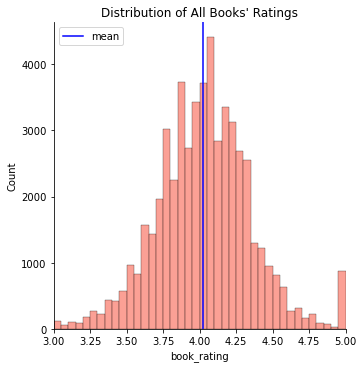

In [18]:
# book ratings distribution
sns.displot(books, x='book_rating',binwidth = 0.05, color = 'salmon')
plt.axvline(x= np.mean(books['book_rating']), color="blue", label="mean")
plt.title('Distribution of All Books\' Ratings' )
plt.legend(loc="upper left")
plt.xlim(3,5)
plt.show()

# Query 3: Genres Spanned Distrbution and vs Ratings

(1.0, 18.0)

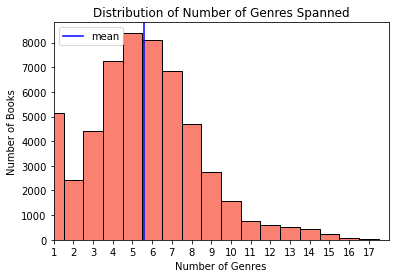

In [50]:
# BOOK RATINGS VS GENRES SPANNED
# QUERY 2: Books ratings vs # genres spanned 
# (do people like books that are about a variety of themes/topics or just a few?)
# dict key some span of rating (ie. 4 - 4.25, 4.25 - 4.5, etc.)
# value is # of genres they span
genre_span_list = np.zeros(len(books['genres']))
for x in books['genres'].index:
        num_genres = str(books['genres'][x]).count('|') + 1
        genre_span_list[x] = num_genres

#print(len(genre_span_list))
#print(genre_span_list)

genre_span_dict = {}
for x in range(len(genre_span_list)):
    if (genre_span_list[x] not in genre_span_dict):
        genre_span_dict[genre_span_list[x]] = 1
    else:
        genre_span_dict[genre_span_list[x]] += 1

ordered_genre_span_dict = collections.OrderedDict(sorted(genre_span_dict.items()))
x = ordered_genre_span_dict.keys()
y = ordered_genre_span_dict.values()
plt.figure(figsize=(6, 4))
plt.bar(x, y, color='salmon', edgecolor="black", width=1)
plt.title('Distribution of Number of Genres Spanned')
plt.xlabel('Number of Genres')
plt.ylabel('Number of Books')
plt.axvline(x= ave_genres_per_book/total_num_books, color="blue", label="mean")
plt.legend(loc="upper left")
plt.xticks(range(18))
plt.xlim(1,18)

In [21]:
# Add column to books dataframe for rate group (Poor, Bad, Decent, Good, Extremely Good) for plotting queries against
books['rate_group'] = pd.cut(books['book_rating'],bins=[0,3,3.5,4,4.5,5], labels=['Poor (0-3)','Bad (3-3.5)','Decent (3.5-4)', 'Good (4-4.5)','Extremely Good (4.5-5)'])
books.head()

,book_authors,book_desc,book_edition,book_format,book_isbn,book_pages,book_rating,book_rating_count,book_review_count,book_title,genres,image_url,rate_group
0,Suzanne Collins,Winning will make you famous. Losing means cer...,NaN,Hardcover,9.78044E+12,374 pages,4.33,5519135,160706,The Hunger Games,Young Adult|Fiction|Science Fiction|Dystopia|F...,https://images.gr-assets.com/books/1447303603l...,Good (4-4.5)
1,J.K. Rowling|Mary GrandPré,There is a door at the end of a silent corrido...,US Edition,Paperback,9.78044E+12,870 pages,4.48,2041594,33264,Harry Potter and the Order of the Phoenix,Fantasy|Young Adult|Fiction,https://images.gr-assets.com/books/1255614970l...,Good (4-4.5)
2,Harper Lee,The unforgettable novel of a childhood in a sl...,50th Anniversary,Paperback,9.78006E+12,324 pages,4.27,3745197,79450,To Kill a Mockingbird,Classics|Fiction|Historical|Historical Fiction...,https://images.gr-assets.com/books/1361975680l...,Good (4-4.5)
3,Jane Austen|Anna Quindlen|Mrs. Oliphant|George...,«È cosa ormai risaputa che a uno scapolo in po...,"Modern Library Classics, USA / CAN",Paperback,9.78068E+12,279 pages,4.25,2453620,54322,Pride and Prejudice,Classics|Fiction|Romance,https://images.gr-assets.com/books/1320399351l...,Good (4-4.5)
4,Stephenie Meyer,About three things I was absolutely positive.F...,NaN,Paperback,9.78032E+12,498 pages,3.58,4281268,97991,Twilight,Young Adult|Fantasy|Romance|Paranormal|Vampire...,https://images.gr-assets.com/books/1361039443l...,Decent (3.5-4)


In [22]:
genre_span_arr = np.array(genre_span_list)
books = books.sort_index(axis=0,ascending=True)
books['genres_spanned'] = genre_span_arr
#books.head()

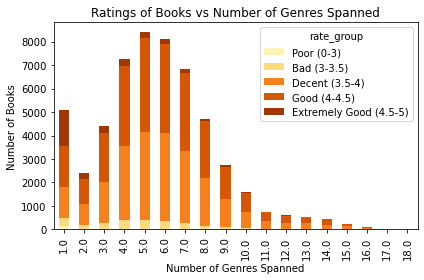

In [23]:
d = books.groupby(['genres_spanned', 'rate_group'])['genres'].size().unstack()
d.plot(kind='bar', stacked=True, title = 'Ratings of Books vs Number of Genres Spanned', colormap=my_cmap)
plt.xlabel('Number of Genres Spanned')
plt.ylabel('Number of Books')
plt.tight_layout()
plt.savefig('genre_span_rating.png', dpi=300)

# Query 4: Book Format vs Rating

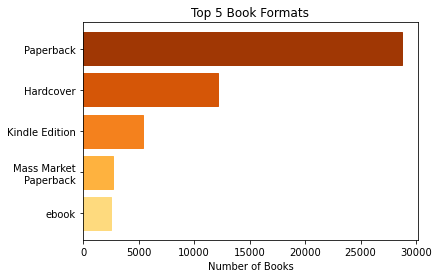

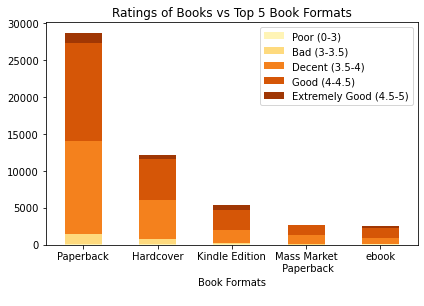

In [24]:
# QUERY: BOOK FORMAT VS RATINGS
book_form = np.array(books['book_format'])
book_form_dict = {}
for x in book_form:
    if x not in book_form_dict:
        book_form_dict[x] = 1
    elif x in book_form_dict:
        book_form_dict[x] += 1
#print(book_form_dict)
# get top 10 book formats
sorted_form_dict = {}
sorted_keys2 = sorted(book_form_dict, key=book_form_dict.get)
for k in sorted_keys2:
    sorted_form_dict[k] = book_form_dict[k]
#print(sorted_form_dict)
top_ten_formats = list(sorted_form_dict)[-1]
final_form_dict = {}

final_form_dict = {'ebook': 2534, 'Mass Market\nPaperback': 2668, 'Kindle Edition': 5436, 'Hardcover': 12163, 'Paperback': 28725}
keys2 = final_form_dict.keys()
values2 = final_form_dict.values()

x = list(keys2)
y = list(values2)
barlist2= plt.barh(x, y,color='#f4811d')
color_arr = ['#fff4b6', '#feda7e', '#feb23f', '#f4811d', '#d55607', '#a03704']
barlist2[0].set_color(color_arr[1])
barlist2[1].set_color(color_arr[2])
barlist2[2].set_color(color_arr[3])
barlist2[3].set_color(color_arr[4])
barlist2[4].set_color(color_arr[5])

plt.title('Top 5 Book Formats')
plt.xlabel('Number of Books')
for i in range(my_cmap.N):
    rgba = my_cmap(i)

# BOOK RATINGS VS BOOK FORMAT
book_format_list = np.zeros(len(books['book_format'])) # keys are 
paperback_count = 0
hardcover_count = 0
kindle_count = 0
mmp_count = 0
ebook_count = 0
other_count = 0
book_form_list = []

#books = books.sort_index(axis=0,ascending=True)
#books['genres_spanned'] = genre_span_arr
for x in books['book_format'].index:
    if books['book_format'][x]== 'Paperback':
        paperback_count+=1
        book_form_list.append(1)
    elif books['book_format'][x]== 'Hardcover':
        hardcover_count+=1
        book_form_list.append(2)
    elif books['book_format'][x]== 'Kindle Edition':
        kindle_count+=1
        book_form_list.append(3)
    elif books['book_format'][x]== 'Mass Market Paperback':
        mmp_count+=1
        book_form_list.append(4)
    elif books['book_format'][x]== 'ebook':
        ebook_count+=1
        book_form_list.append(5)
    else:
        book_form_list.append(0)
        other_count+=1

book_form_arr = np.array(book_form_list)
books['books_format'] = book_form_arr
#books.head()
sss = books.groupby(['books_format', 'rate_group'])['genres'].size().unstack()
ax = sss.plot(kind='bar', stacked=True, title = 'Ratings of Books vs Top 5 Book Formats',colormap=my_cmap)
plt.legend(loc="upper right")
plt.tight_layout()
plt.xlim(0.5, 5.5)
ax.set_xticks([1, 2, 3, 4, 5])
ax.set_xticklabels(['Paperback', 'Hardcover', 'Kindle Edition', 'Mass Market\n Paperback', 'ebook'], rotation=0)
ax.set_xlabel('Book Formats\n')
plt.savefig('book_format_vs_rating3.png', dpi=300)


# Query 5: Title Word Length vs Rating

In [25]:
# BOOK RATINGS VS NUMBER OF LETTERS IN TITLE
title_len_list = np.zeros(len(books['book_title']))
for x in books['book_title'].index:
        num_title_words = int(len(str(books['book_title'][x]).split()))
        title_len_list[x] = num_title_words
#print(title_len_list)
title_len_arr = np.array(title_len_list)
books['title_word_len'] = title_len_arr
#books.head()

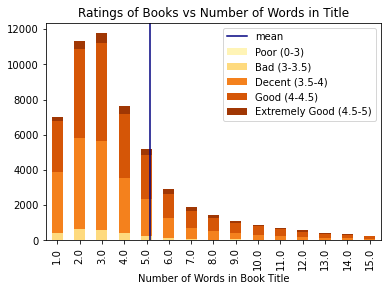

In [26]:
ss = books.groupby(['title_word_len', 'rate_group'])['genres'].size().unstack()
ss.plot(kind='bar', stacked=True, title = 'Ratings of Books vs Number of Words in Title',colormap=my_cmap)
plt.axvline(x= np.mean(books['title_word_len']), color="navy", label="mean")
plt.legend(loc="upper right")
plt.xlim(-0.5, 14.5)
plt.xlabel('Number of Words in Book Title')
plt.savefig('book_word_len_vs_rating.png', dpi=300)

In [38]:
# add book pages column count in dataframe, for correlation matrix
book_pages = books['book_pages'].str.rstrip('pages ')
book_pages = book_pages.dropna()
book_pages = book_pages.astype(int, copy=True, errors='raise')
#book_pages = book_pages.sort_values(False)
#print(book_pages)
books['book_pgs'] = book_pages

# Correlation Matrix

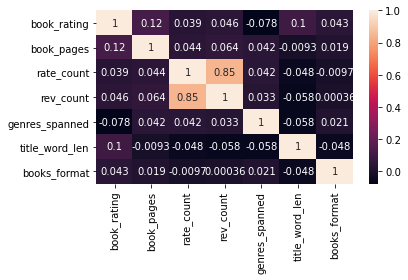

In [37]:
# Correlation Matrix
df_core = pd.concat([books['book_rating'], books['book_pgs'], books['book_rating_count'],books['book_review_count'],books['genres_spanned'], books['title_word_len'], books['books_format']], axis=1, keys=['book_rating', 'book_pages', 'rate_count', 'rev_count', 'genres_spanned', 'title_word_len','books_format'])
#print(df_core)
#df_core.corr()
corrMatrix2 = df_core.corr()
#print (corrMatrix2)
sns.heatmap(corrMatrix2, annot=True)
plt.tight_layout()
plt.savefig('correlation_matrix.png', dpi=300)
plt.show()